Context scenario:
if we are the wine yard, then based on the quality of the produce we would want to know the exact quality from 3 to 8, but problem being the 3 and 8 being undersampled. hence might not be accurate.
thats why to consider adding samples into the low and high quality category.
if we are a restaurant, we would want to roughly know the rough quality of the wine. then classifying them to 0 and 1 is more accurate.


In [ ]:
problem statement: 
Our problem is best framed as 2-class, single-label classification, 
which predicts whether a wine will be in one of two classes—{good, bad}—based on the features of the wine provided.

#logistic regression

In [55]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb

In [56]:
df = pd.read_csv('winequality-red.csv').dropna()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [57]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [68]:
def myconverterfunction(_quality):
    if _quality > 5:
        return 1
    else:
        return 0

df['quality'] = df['quality'].apply(myconverterfunction)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [69]:
x=df.drop(['quality'],axis=1)
y=df['quality']

In [70]:
for attr in x.columns:
    print ('\n*',attr,'*')
    print(x[attr].value_counts())


* fixed acidity *
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.4     1
14.0     1
5.5      1
4.6      1
4.7      1
Name: fixed acidity, Length: 96, dtype: int64

* volatile acidity *
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.090     1
1.035     1
1.580     1
0.950     1
0.805     1
Name: volatile acidity, Length: 143, dtype: int64

* citric acid *
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.75      1
0.78      1
1.00      1
0.62      1
0.72      1
Name: citric acid, Length: 80, dtype: int64

* residual sugar *
2.00    156
2.20    131
1.80    129
2.10    128
1.90    117
       ... 
5.70      1
2.85      1
7.30      1
8.90      1
2.65      1
Name: residual sugar, Length: 91, dtype: int64

* chlorides *
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.137     1
0.267     1
0.043     1
0.186     1
0.125     1
Name: chlorides, Length: 153, dtype: int64

* free sulfur dioxide *
6.0

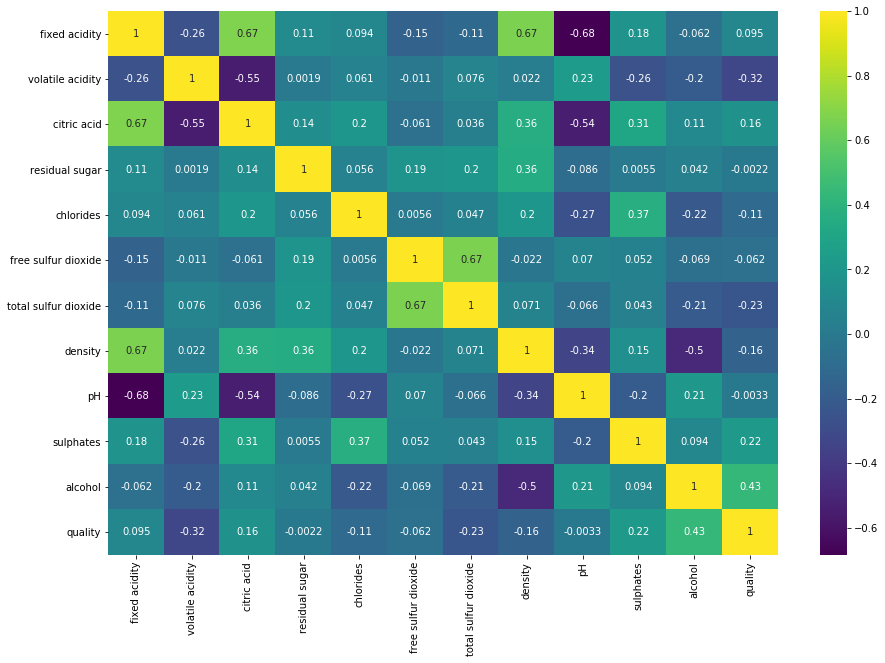

In [71]:
colormap = plt.cm.viridis
cor = df.corr()
plt.figure(figsize=(15,10))
sb.heatmap(cor,cmap=colormap,annot=True

In [125]:
import datetime

begin_time = datetime.datetime.now()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)
logReg = LogisticRegression(random_state = 42,max_iter = 1000)
logReg.fit(x_train, y_train)

y_pred = logReg.predict(x_test)
print(y_pred)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print(datetime.datetime.now()-begin_time)

[0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1
 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1
 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1
 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1
 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1
 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1
 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0
 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0
 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1]
0.7325
0:00:00.242854


Add the confusion matrix:
    

In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, y_pred, labels = [1,0])

array([[156,  66],
       [ 49, 129]], dtype=int64)

In [73]:
#logistic regression (using only a few columns)

In [123]:
import datetime

begin_time = datetime.datetime.now()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df.loc[:,['volatile acidity','total sulfur dioxide', 'sulphates', 'alcohol']], df['quality'], random_state = 42)
logReg = LogisticRegression(multi_class = 'multinomial',random_state = 42, max_iter = 1000)
logReg.fit(x_train, y_train)

y_pred = logReg.predict(x_test)
from sklearn.metrics import accuracy_score
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

print(datetime.datetime.now()-begin_time)

Accuracy Score:  0.715
0:00:00.049973


In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, y_pred, labels = [1,0])

array([[157,  65],
       [ 49, 129]], dtype=int64)

#KNN classification

In [126]:
# we'll use the sepal dimesnions as the features
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import datetime

begin_time = datetime.datetime.now()
# we let k = 5 first, which means choosing 3 nearest neighbors.
knn = KNeighborsClassifier(n_neighbors = 3) 
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['quality'], random_state = 42)
x_train.head()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
from sklearn.metrics import accuracy_score
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Time for processing: ',datetime.datetime.now()-begin_time)

Accuracy Score:  0.76
Time for processing:  0:00:00.040977


with all features:
by using 5 neighbours we have got:
Accuracy Score:  0.7175
Time for processing:  0:00:00.041978

by using 3 neighbours we have got: 
Accuracy Score:  0.76
Time for processing:  0:00:00.035978

by using 2 neighbours we have got: 
Accuracy Score:  0.8275
Time for processing:  0:00:00.038977

timing always changes~~ to do the averaging..

In [117]:
# we'll use the sepal dimesnions as the features
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import datetime

begin_time = datetime.datetime.now()
# we let k = 5 first, which means choosing 5 nearest neighbors.
knn = KNeighborsClassifier(n_neighbors = 5) 
x_train, x_test, y_train, y_test = train_test_split(df.loc[:,['volatile acidity','total sulfur dioxide', 'sulphates', 'alcohol']], df['quality'], random_state = 42)
x_train.head()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
from sklearn.metrics import accuracy_score
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Time for processing: ',datetime.datetime.now()-begin_time)

Accuracy Score:  0.675
Time for processing:  0:00:00.039992


with features above 0.2 correlation:
by using 5 neighbours we have got:
Accuracy Score:  0.675
Time for processing:  0:00:00.036978

by using 3 neighbours we have got: 
Accuracy Score:  0.6675
Time for processing:  0:00:00.031980

by using 1 neighbours we have got: 
Accuracy Score:  0.74
Time for processing:  0:00:00.037974

#decision tree

In [102]:
data = df.iloc[:,0:10] # independent variables
target = df['quality']  # dependent variable: y
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71


In [127]:
import datetime
begin_time = datetime.datetime.now()

# import train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, random_state = 42)

# import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier

# instantiate a decision tree model. All parameters can be omited to use default ones.
# details please check https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt = DecisionTreeClassifier(max_depth=3) 
dt.fit(x_train, y_train) # train our model
y_pred = dt.predict(x_test) # let the model predict the test data

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print('Time for processing: ',datetime.datetime.now()-begin_time)

0.7
Time for processing:  0:00:00.040977


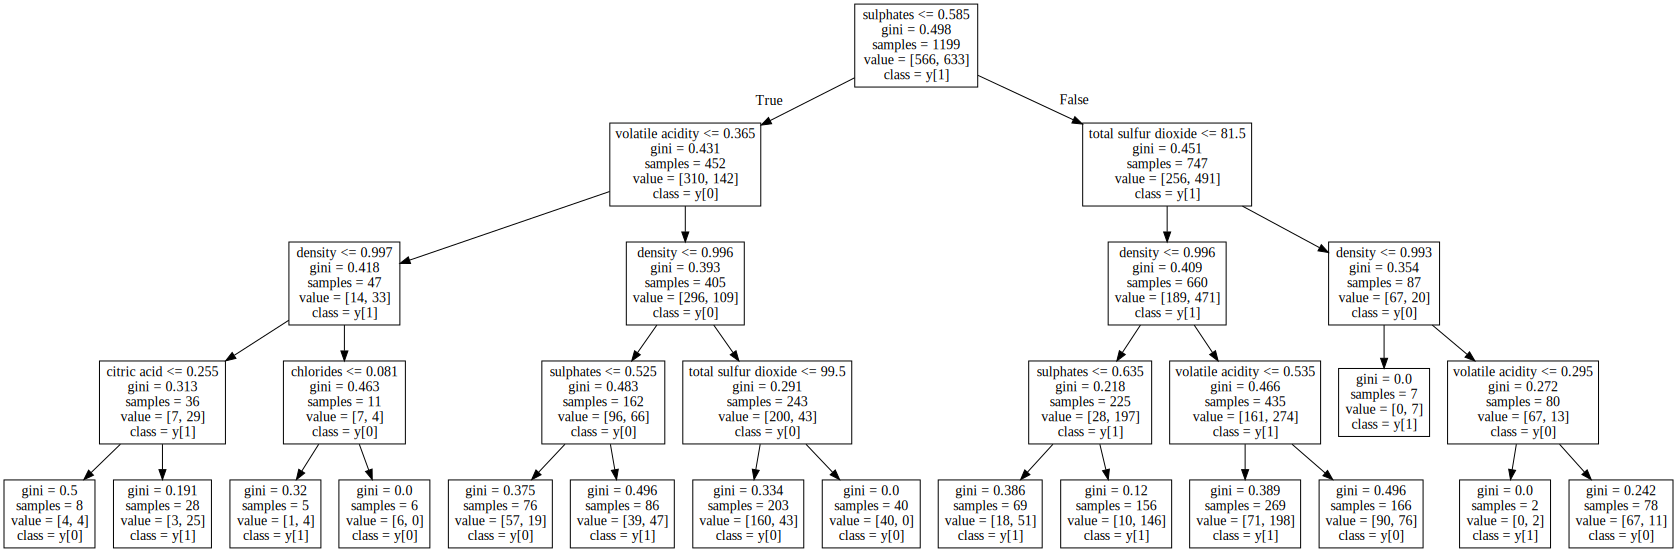

In [109]:
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns)) # display the tree, with no output file

try only with the 4 main features:

In [118]:
data1 = df.loc[:,['volatile acidity','total sulfur dioxide', 'sulphates', 'alcohol']] # independent variables
target1 = df['quality']  # dependent variable: y
data1

,volatile acidity,total sulfur dioxide,sulphates,alcohol
0,0.700,34.0,0.56,9.4
1,0.880,67.0,0.68,9.8
2,0.760,54.0,0.65,9.8
3,0.280,60.0,0.58,9.8
4,0.700,34.0,0.56,9.4
...,...,...,...,...
1594,0.600,44.0,0.58,10.5
1595,0.550,51.0,0.76,11.2
1596,0.510,40.0,0.75,11.0
1597,0.645,44.0,0.71,10.2


In [130]:
import datetime
begin_time = datetime.datetime.now()

# import train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data1, target1, random_state = 42)

# import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3) 
dt.fit(x_train, y_train) # train our model
y_pred = dt.predict(x_test) # let the model predict the test data

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print('Time for processing: ',datetime.datetime.now()-begin_time)

0.705
Time for processing:  0:00:00.010993


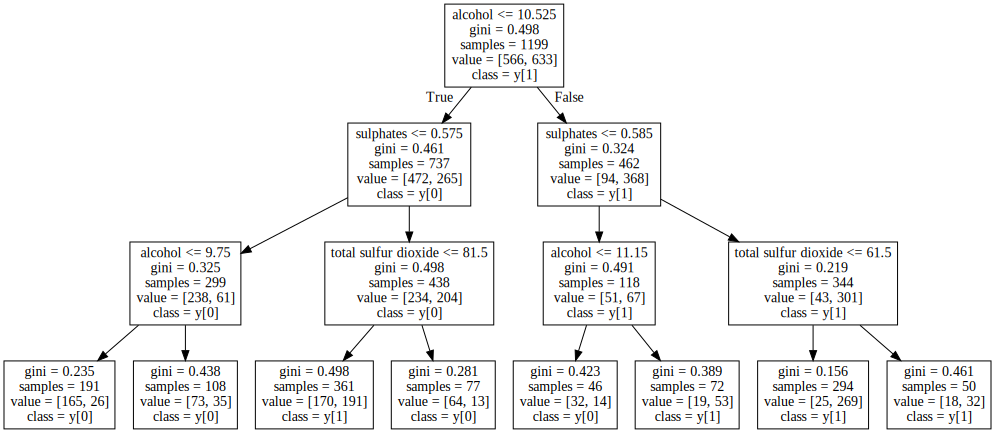

In [131]:

Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns))